# Assignment A1b - Functions and Computation
---
### Ryan Lin


## Imports

In [20]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from gabor import *
from trig import *
from gammatone import *
from A1b2 import *


## 1a sinewave

In [21]:
sinewave(0.0, f=5, d=0.05)

np.float64(-1.0)

## 1b gabor


spatial signal

In [22]:
def test_gaussian_envelope_center():
    sigma = 1.0
    val_at_zero = gaussian_envelope(0, sigma)
    assert np.isclose(val_at_zero, 1.0), f"Expected 1.0, got {val_at_zero}"
    print("test_gaussian_envelope_center: PASSED")

test_gaussian_envelope_center()


test_gaussian_envelope_center: PASSED


In [23]:
def test_gaussian_envelope_symmetry():
    sigma = 1.0
    t_vals = np.linspace(-3, 3, 10)
    for t in t_vals:
        pos_val = gaussian_envelope(t, sigma)
        neg_val = gaussian_envelope(-t, sigma)
        assert np.isclose(pos_val, neg_val), f"Asymmetry at t={t}"
    print("test_gaussian_envelope_symmetry: PASSED")

test_gaussian_envelope_symmetry()


test_gaussian_envelope_symmetry: PASSED


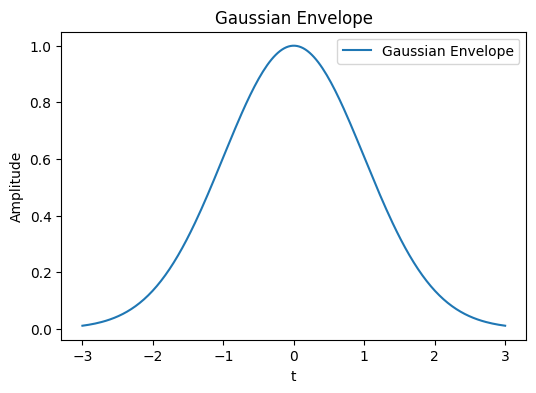

In [24]:
t_plot = np.linspace(-3, 3, 200)
sigma = 1.0
env_vals = gaussian_envelope(t_plot, sigma)

plt.figure(figsize=(6,4))
plt.plot(t_plot, env_vals, label='Gaussian Envelope')
plt.title("Gaussian Envelope")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [25]:
def test_gabor_value_at_zero():
    sigma = 1.0
    f = 5.0
    phi = np.pi / 2
    a = 2.0
    val_at_zero = gabor(0, sigma, f, phi, a)
    expected = a * np.cos(phi)  # = 2.0 * 0 = 0
    assert np.isclose(val_at_zero, expected), f"Expected {expected}, got {val_at_zero}"
    print("test_gabor_value_at_zero: PASSED")

test_gabor_value_at_zero()


test_gabor_value_at_zero: PASSED


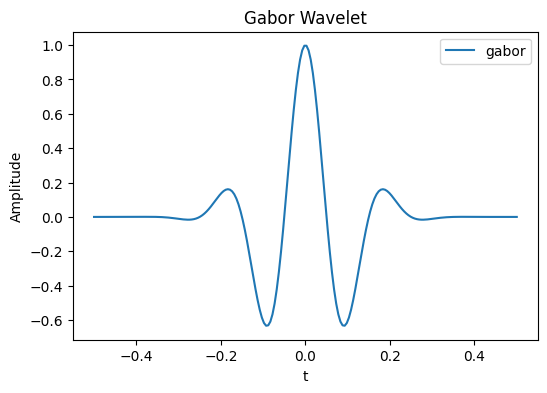

In [26]:
t_plot = np.linspace(-0.5, 0.5, 200)
sigma = 0.1
f = 5.0
phi = 0
a = 1

gabor_vals = gabor(t_plot, sigma, f, phi, a)
plt.figure(figsize=(6,4))
plt.plot(t_plot, gabor_vals, label='gabor')
plt.title("Gabor Wavelet")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [27]:
def test_gaboro_value_at_zero():
    sigma = 1.0
    f = 5.0
    phi = 0
    a = 2.0
    val_at_zero = gaboro(t=0, sigma=sigma,f=f, phi=phi, a=a)
    expected = a * np.sin(phi)  # = 2 * 0 = 0
    assert np.isclose(val_at_zero, expected), f"Expected {expected}, got {val_at_zero}"
    print("test_gaboro_value_at_zero: PASSED")

test_gaboro_value_at_zero()


test_gaboro_value_at_zero: PASSED


In [28]:
def test_gabore_equivalence():
    sigma = 1.0
    f = 5.0
    phi = np.pi / 3
    a = 1.5
    test_ts = np.linspace(-1, 1, 100)

    for tt in test_ts:
        val_gabore = gabore(tt, sigma, f, phi, a)
        val_gabor  = gabor(tt, sigma, f, phi, a)
        assert np.isclose(val_gabore, val_gabor), "Mismatch between gabore and gabor"
    print("test_gabore_equivalence: PASSED")

test_gabore_equivalence()


test_gabore_equivalence: PASSED


In [29]:
def test_gabor_norm():
    f = 5.0
    sigma = 1.0
    fs = 1000  
    d = 0

    norm_const = gabor_norm(f, sigma, fs, d)

    # Recreate the time axis (same approach as gabor_norm)
    t_range = 3 * sigma
    num_samples = int(2 * t_range * fs)
    t = np.linspace(-t_range, t_range, num_samples)

    # Construct the raw wavelet (cos-based) for testing
    g_values = gaussian_envelope(t, sigma) * np.cos(2 * np.pi * f * t + d)

    # Multiply by normalizing constant
    normed_values = norm_const * g_values

    # Numerically integrate the square
    energy = np.trapezoid(normed_values**2, t)

    assert np.isclose(energy, 1.0, atol=1e-3), f"Energy not close to 1: {energy}"
    print(f"test_gabor_norm: PASSED (energy={energy:.5f})")

test_gabor_norm()


test_gabor_norm: PASSED (energy=1.00000)


In [30]:
def test_gabore_norm():
    f = 5.0
    sigma = 1.0
    fs = 1000
    d = 0

    norm_const = gabore_norm(f, sigma, fs, d)
    t_range = 3 * sigma
    num_samples = int(2 * t_range * fs)
    t = np.linspace(-t_range, t_range, num_samples)

    g_values = gaussian_envelope(t, sigma) * np.cos(2 * np.pi * f * t + d)
    normed_values = norm_const * g_values

    energy = np.trapezoid(normed_values**2, t)
    assert np.isclose(energy, 1.0, atol=1e-3), f"Energy not close to 1: {energy}"
    print(f"test_gabore_norm: PASSED (energy={energy:.5f})")

test_gabore_norm()


test_gabore_norm: PASSED (energy=1.00000)


In [31]:
def test_gaboro_norm():
    f = 5.0
    sigma = 1.0
    fs = 1000
    d = 0

    norm_const = gaboro_norm(f, sigma, fs, d)
    t_range = 3 * sigma
    num_samples = int(2 * t_range * fs)
    t = np.linspace(-t_range, t_range, num_samples)

    g_values = gaussian_envelope(t, sigma) * np.sin(2 * np.pi * f * t + d)
    normed_values = norm_const * g_values

    energy = np.trapezoid(normed_values**2, t)
    assert np.isclose(energy, 1.0, atol=1e-3), f"Energy not close to 1: {energy}"
    print(f"test_gaboro_norm: PASSED (energy={energy:.5f})")

test_gaboro_norm()


test_gaboro_norm: PASSED (energy=1.00000)


## 1c gammatone

cochlear signal

In [36]:

norm = gammatone_norm(f=100, n=4)
gammatone(0.01, a=norm, f=100, n=4)




np.float64(-0.012557328100777636)

## 2a localmaxima

In [33]:
def test_localmaxima():
    signal = [0, 1, 0, 2, 1, 3, 2]
    expected_output = [1, 3, 5]
    assert localmaxima(signal) == expected_output
    print("localmaxima test passed!")


test_localmaxima()

localmaxima test passed!


## 2b crossings

In [34]:
def test_threshold_crossings():
    signal = [0, 1, 2, 1, 0, 2, 3, 1]
    threshold = 1.5
    expected_output_both = [2, 3, 5, 7]
    expected_output_negpos = [2, 5]
    expected_output_posneg = [3, 7]
    assert np.array_equal(threshold_crossings(signal, threshold, "both"), expected_output_both)
    assert np.array_equal(threshold_crossings(signal, threshold, "negpos"), expected_output_negpos)
    assert np.array_equal(threshold_crossings(signal, threshold, "posneg"), expected_output_posneg)
    print("threshold_crossings tests passed!")


test_threshold_crossings()


threshold_crossings tests passed!


## 2c envelope

In [35]:
def test_envelope():
    signal = [0, 2, 4, 6, 8, 10]
    nblocks = 2
    expected_lower = [0, 6]
    expected_upper = [4, 10]
    expected_indices = [0, 3]
    lower, upper, indices = envelope(signal, nblocks)
    assert np.array_equal(lower, expected_lower)
    assert np.array_equal(upper, expected_upper)
    assert np.array_equal(indices, expected_indices)
    print("envelope test passed!")

test_envelope()

envelope test passed!
